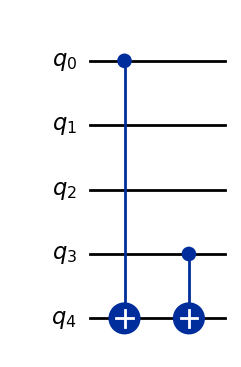

'1001'

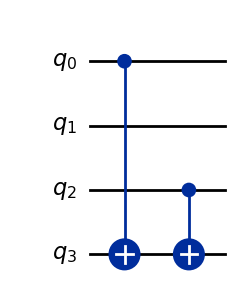

'101'

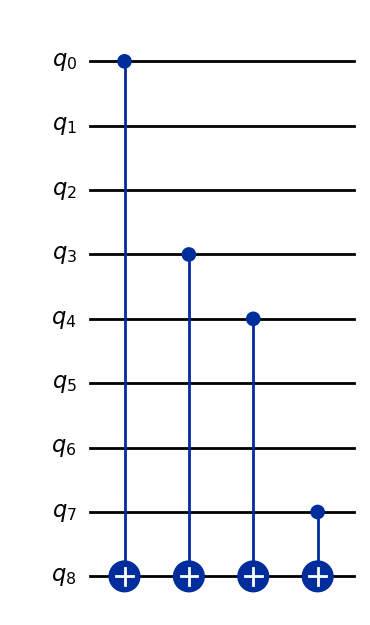

'10011001'

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc
     

def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc
     

def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=500, memory=True).result()
    return result.get_memory()[0]
     

bit_string = "1001"
display(bv_function(bit_string).draw("mpl"))
display(bv_algorithm(bv_function(bit_string)))
     

bit_string = "101"
display(bv_function(bit_string).draw("mpl"))
display(bv_algorithm(bv_function(bit_string)))
     

bit_string = "10011001"
display(bv_function(bit_string).draw("mpl"))
display(bv_algorithm(bv_function(bit_string)))

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile

def bernstein_vazirani_circuit(n, secret_string):
    # Create quantum and classical registers
    qr = QuantumRegister(n+1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)

    # Initialize the last qubit to |->
    qc.x(n)
    qc.h(n)

    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        qc.h(i)

    # Apply the oracle
    for i in range(n):
        if secret_string[i] == '1':
            qc.cx(i, n)

    # Apply Hadamard gates to the input register
    for i in range(n):
        qc.h(i)

    # Measure the input register
    qc.measure(range(n), range(n))

    return qc

def run_bernstein_vazirani(n, secret_string):
    qc = bernstein_vazirani_circuit(n, secret_string)
    
    # Use AerSimulator
    simulator = AerSimulator()
    
    # Transpile the circuit for the simulator
    transpiled_qc = transpile(qc, simulator)
    
    # Run the simulation
    job = simulator.run(transpiled_qc, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    # Plot the results
    plot_histogram(counts)
    
    # Get the most frequent result
    most_frequent = max(counts, key=counts.get)
    
    return most_frequent

# Example usage
n = 4  # number of qubits (excluding ancilla)
secret_string = '1011'  # the secret string to be discovered

print(f"Secret string: {secret_string}")
result = run_bernstein_vazirani(n, secret_string)
print(f"Algorithm output: {result}")
print(f"Success: {result == secret_string}")

Secret string: 1011
Algorithm output: 1101
Success: False
